# library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
import math
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#mount gdrive

# import data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Informatics-ITTP/SEMESTER 6/Data Mining/TUBES/20210519_opendata-1.csv')
df_dict = pd.read_csv('/content/drive/MyDrive/Informatics-ITTP/SEMESTER 6/Data Mining/TUBES/data-dictionary.csv')

df.head(100)

,Site Name,Department,Year,Current Solar,Electric Utility,Electricity Usage,Peak Electric Demand,Building Type,Building Area,Natural Gas Usage,Energy Use Intensity,Address,Latitude,Longitude
0,PHX Building 139,Aviation,2020,0,APS,1,0,REPAIRSERVICES,3616,0,0.00,2745 E Air Ln,33.44299,-112.02176
1,Old Verde Park Cntr,Parks,2020,0,APS,12,0,UNKNOWN,0,0,NaN,916 E Van Buren St,33.45205,-112.06179
2,North Ranger Station - Old,Parks,2020,0,APS,77,0,OFFICE,0,0,NaN,11659 N 16th St,33.59485,-112.04768
3,Lookout Mountain Trailhead,Parks,2020,0,APS,242,0,OUTDOORREC,0,0,NaN,15415 N 16th St,33.62720,-112.04820
4,Laveen Basin,Parks,2020,0,SRP,317,0,PARK,0,0,NaN,6039 S 43rd Ave,33.39098,-112.14917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Historic Fire Station 8,Fire,2020,0,APS,18214,0,OFFICE,2250,56,27.92,541 W Encanto Blvd,33.47275,-112.08255
96,Nueve Park,Parks,2020,0,SRP,19229,101,PARK,0,0,NaN,4445 S 9th St,33.40521,-112.05937
97,Ma-Ha Tuak Park,Parks,2020,0,SRP,19883,28,PARK,0,0,NaN,9832 S 7th Ave,33.35721,-112.08417
98,Bloomfield Warehouse,Parks,2020,0,APS,19977,0,WAREHOUSE-UNREFR,2654,651,48.17,3201 E Bloomfield Rd,33.59954,-112.01282


In [ ]:
df_dict

,column,type,label,description
0,Site Name,text,Site Name,Facility or group name.
1,Department,text,Department,Name of City department that operates facility.
2,Year,text,Year,Calendar year of energy data.
3,Current Solar,numeric,Current Solar,Peak capacity of current solar array installed...
4,Electric Utility,text,Electric Utility,Utility that provides electricity to site.
5,Electricity Usage,numeric,Electricity Usage (kWh),Total annual electricity consumption at site i...
6,Peak Electric Demand,numeric,Peak Electric Demand (kW),Maximum electricity demand in one hour as refl...
7,Building Type,text,Building Type,Type of facility as labeled by EPA Energy Star.
8,Building Area,numeric,Building Area (SqFt),Total area of building on record.
9,Natural Gas Usage,numeric,Natural Gas Usage (therm),Total annual natural gas consumption at site i...


# data exploration


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Site Name             503 non-null    object 
 1   Department            503 non-null    object 
 2   Year                  503 non-null    int64  
 3   Current Solar         503 non-null    int64  
 4   Electric Utility      503 non-null    object 
 5   Electricity Usage     503 non-null    int64  
 6   Peak Electric Demand  503 non-null    int64  
 7    Building Type        502 non-null    object 
 8   Building Area         503 non-null    int64  
 9   Natural Gas Usage     503 non-null    int64  
 10  Energy Use Intensity  287 non-null    float64
 11  Address               502 non-null    object 
 12  Latitude              489 non-null    float64
 13  Longitude             489 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 55.1+ KB


In [ ]:
df.describe()

,Year,Current Solar,Electricity Usage,Peak Electric Demand,Building Area,Natural Gas Usage,Energy Use Intensity,Latitude,Longitude
count,503.0,503.000000,5.030000e+02,503.000000,5.030000e+02,503.000000,287.000000,489.000000,489.000000
mean,2020.0,33.222664,1.183953e+06,191.411531,2.730766e+04,2117.711730,81.129303,33.505784,-112.071781
std,0.0,389.039560,1.267330e+07,1107.928315,1.364830e+05,17238.074255,195.942631,0.101549,0.061346
min,2020.0,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,33.291660,-112.288850
25%,2020.0,0.000000,2.968400e+04,0.000000,0.000000e+00,0.000000,28.750000,33.438240,-112.107440
50%,2020.0,0.000000,9.064000e+04,37.000000,3.600000e+03,0.000000,44.120000,33.471410,-112.071870
75%,2020.0,0.000000,2.286480e+05,103.000000,1.349950e+04,99.000000,68.255000,33.582570,-112.029420
max,2020.0,7500.000000,2.713631e+08,22957.000000,1.918732e+06,297702.000000,2055.030000,33.806080,-111.746200


In [ ]:
df.describe(include='all')

,Site Name,Department,Year,Current Solar,Electric Utility,Electricity Usage,Peak Electric Demand,Building Type,Building Area,Natural Gas Usage,Energy Use Intensity,Address,Latitude,Longitude
count,503,503,503.0,503.000000,503,5.030000e+02,503.000000,502,5.030000e+02,503.000000,287.000000,502,489.000000,489.000000
unique,500,18,NaN,NaN,3,NaN,NaN,54,NaN,NaN,NaN,450,NaN,NaN
top,19th Ave Landfill,Parks,NaN,NaN,APS,NaN,NaN,PARK,NaN,NaN,NaN,702 W Deer Valley Dr,NaN,NaN
freq,2,220,NaN,NaN,355,NaN,NaN,126,NaN,NaN,NaN,9,NaN,NaN
mean,NaN,NaN,2020.0,33.222664,NaN,1.183953e+06,191.411531,NaN,2.730766e+04,2117.711730,81.129303,NaN,33.505784,-112.071781
std,NaN,NaN,0.0,389.039560,NaN,1.267330e+07,1107.928315,NaN,1.364830e+05,17238.074255,195.942631,NaN,0.101549,0.061346
min,NaN,NaN,2020.0,0.000000,NaN,1.000000e+00,0.000000,NaN,0.000000e+00,0.000000,0.000000,NaN,33.291660,-112.288850
25%,NaN,NaN,2020.0,0.000000,NaN,2.968400e+04,0.000000,NaN,0.000000e+00,0.000000,28.750000,NaN,33.438240,-112.107440
50%,NaN,NaN,2020.0,0.000000,NaN,9.064000e+04,37.000000,NaN,3.600000e+03,0.000000,44.120000,NaN,33.471410,-112.071870
75%,NaN,NaN,2020.0,0.000000,NaN,2.286480e+05,103.000000,NaN,1.349950e+04,99.000000,68.255000,NaN,33.582570,-112.029420


In [ ]:
df.isna().sum()

Site Name                 0
Department                0
Year                      0
Current Solar             0
Electric Utility          0
Electricity Usage         0
Peak Electric Demand      0
 Building Type            1
Building Area             0
Natural Gas Usage         0
Energy Use Intensity    216
Address                   1
Latitude                 14
Longitude                14
dtype: int64

In [ ]:
df.columns

Index(['Site Name', 'Department', 'Year', 'Current Solar', 'Electric Utility',
       'Electricity Usage', 'Peak Electric Demand', ' Building Type ',
       'Building Area', 'Natural Gas Usage', 'Energy Use Intensity', 'Address',
       'Latitude', 'Longitude'],
      dtype='object')

# data cleaning

In [ ]:
def remove_column_spaces(column_names):
    df = []
    for column_name in column_names:
        df.append(column_name.strip())
    return df

df.columns = remove_column_spaces(df.columns)

In [ ]:
df.columns

Index(['Site Name', 'Department', 'Year', 'Current Solar', 'Electric Utility',
       'Electricity Usage', 'Peak Electric Demand', 'Building Type',
       'Building Area', 'Natural Gas Usage', 'Energy Use Intensity', 'Address',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# drop Latitude, Longitude col
df.drop(['Latitude','Longitude','Year'], axis=1, inplace=True)

In [ ]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']

for feature in df[categorical]:
        print(f'{feature}: {df[feature].nunique()}')

Site Name: 500
Department: 18
Electric Utility: 3
Building Type: 54
Address: 450


In [ ]:
# replace null to 'none'
df['Address'].fillna('None', inplace=True)
df['Address'] = df['Address'].replace(' N/A ','None')

In [ ]:
# replace Energy Use Intensity ke nilai median
df[['Energy Use Intensity']] = df[['Energy Use Intensity']].fillna(df[['Energy Use Intensity']].median())

In [ ]:
# replace null to 'none'
df['Building Type'].fillna('None', inplace=True)
df['Building Type'] = df['Building Type'].replace(' N/A ','None')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Site Name             503 non-null    object 
 1   Department            503 non-null    object 
 2   Current Solar         503 non-null    int64  
 3   Electric Utility      503 non-null    object 
 4   Electricity Usage     503 non-null    int64  
 5   Peak Electric Demand  503 non-null    int64  
 6   Building Type         503 non-null    object 
 7   Building Area         503 non-null    int64  
 8   Natural Gas Usage     503 non-null    int64  
 9   Energy Use Intensity  503 non-null    float64
 10  Address               503 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 43.4+ KB


# EDA

In [ ]:
df

,Site Name,Department,Current Solar,Electric Utility,Electricity Usage,Peak Electric Demand,Building Type,Building Area,Natural Gas Usage,Energy Use Intensity,Address
0,PHX Building 139,Aviation,0,APS,1,0,REPAIRSERVICES,3616,0,0.00,2745 E Air Ln
1,Old Verde Park Cntr,Parks,0,APS,12,0,UNKNOWN,0,0,44.12,916 E Van Buren St
2,North Ranger Station - Old,Parks,0,APS,77,0,OFFICE,0,0,44.12,11659 N 16th St
3,Lookout Mountain Trailhead,Parks,0,APS,242,0,OUTDOORREC,0,0,44.12,15415 N 16th St
4,Laveen Basin,Parks,0,SRP,317,0,PARK,0,0,44.12,6039 S 43rd Ave
...,...,...,...,...,...,...,...,...,...,...,...
498,Streetlights,Streets,0,APS/SRP,38461529,0,None,0,0,0.00,None
499,Street Landscaping,Streets,0,APS/SRP,248853,0,None,0,0,0.00,None
500,Transit Stops,Public Transit,0,APS/SRP,598844,0,None,0,0,0.00,None
501,Water Services Department,Water,7500,APS/SRP,271363124,0,None,0,179591,0.00,None


<Axes: xlabel='Electric Utility', ylabel='Electricity Usage'>

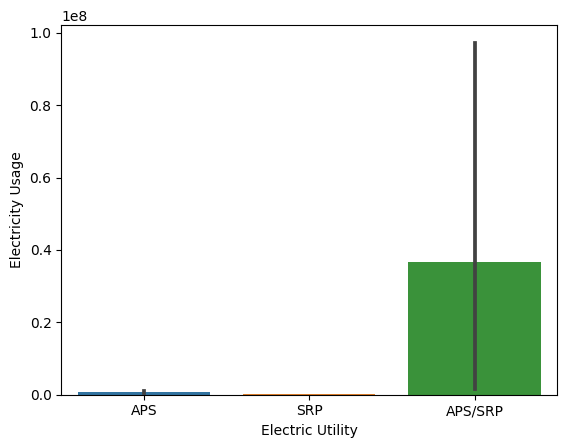

In [ ]:
sns.barplot(data=df, x='Electric Utility', y='Electricity Usage')

<ipython-input-125-cb3063e46db3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


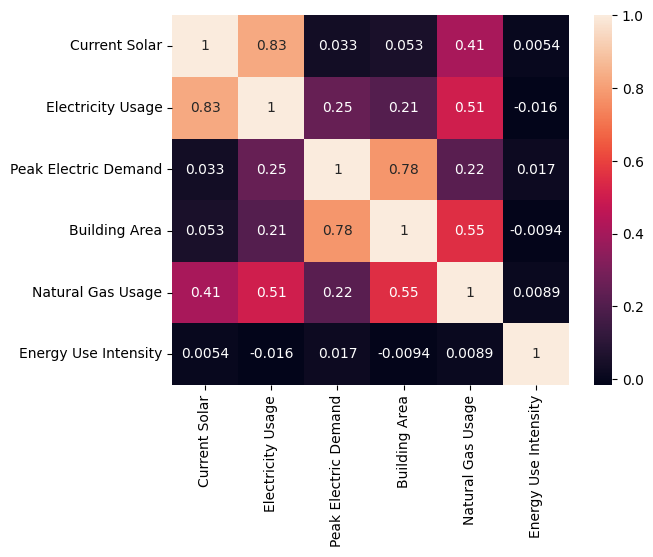

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.savefig('corr.tiff', format='tiff', dpi=300)

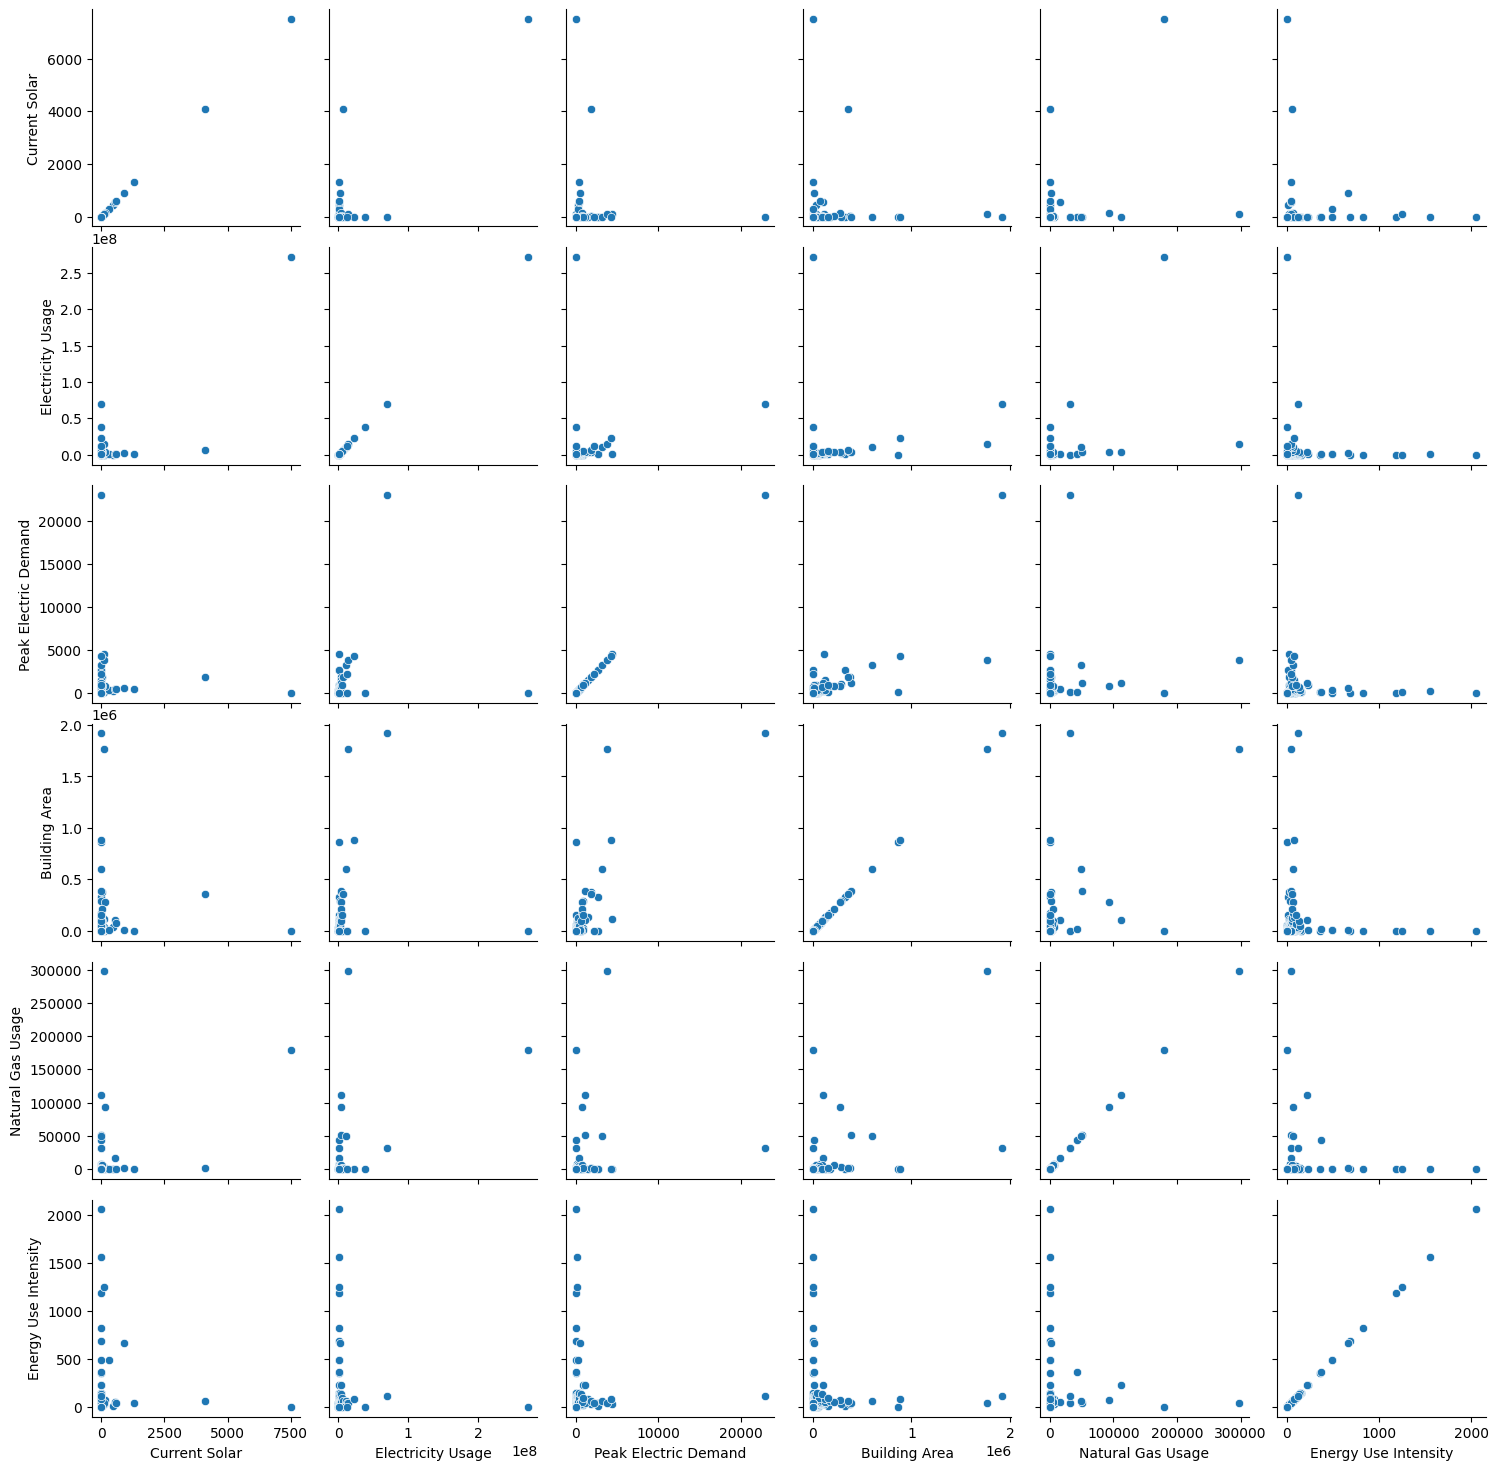

In [ ]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)
plt.savefig('scatter.tiff', format='tiff', dpi=300)

<Axes: xlabel='Current Solar', ylabel='Peak Electric Demand'>

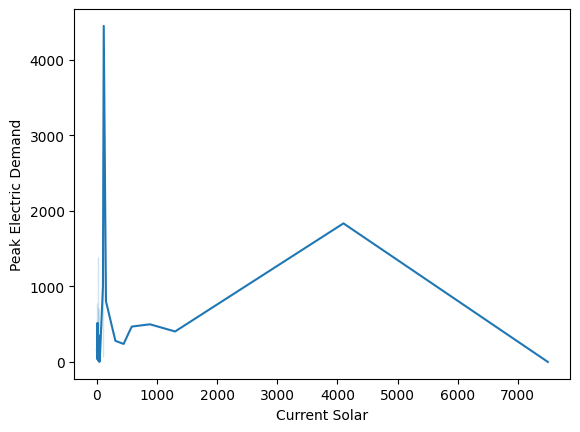

In [ ]:
sns.lineplot(df, x='Current Solar', y='Peak Electric Demand')

<Axes: xlabel='Current Solar', ylabel='Electricity Usage'>

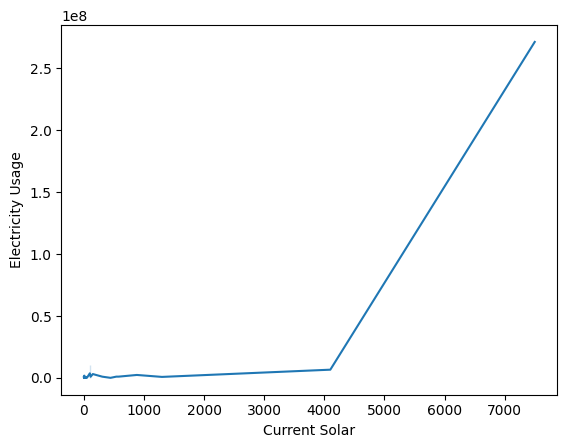

In [ ]:
sns.lineplot(df, x='Current Solar', y='Electricity Usage')

In [ ]:
df.describe()

,Current Solar,Electricity Usage,Peak Electric Demand,Building Area,Natural Gas Usage,Energy Use Intensity
count,503.000000,5.030000e+02,503.000000,5.030000e+02,503.000000,503.000000
mean,33.222664,1.183953e+06,191.411531,2.730766e+04,2117.711730,65.236640
std,389.039560,1.267330e+07,1107.928315,1.364830e+05,17238.074255,149.029742
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,2.968400e+04,0.000000,0.000000e+00,0.000000,40.080000
50%,0.000000,9.064000e+04,37.000000,3.600000e+03,0.000000,44.120000
75%,0.000000,2.286480e+05,103.000000,1.349950e+04,99.000000,52.350000
max,7500.000000,2.713631e+08,22957.000000,1.918732e+06,297702.000000,2055.030000


In [ ]:
# function remove outlier
def outlier(dataset, col):
  Q1 = dataset[col].quantile(0.25)
  Q3 = dataset[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  dataset = dataset[(dataset['Electricity Usage'] >= lower_bound) & (dataset['Electricity Usage'] <= upper_bound)]

  print("Jumlah data:", len(dataset))

In [ ]:
outlier(df,'Current Solar')
outlier(df,'Electricity Usage')
outlier(df,'Peak Electric Demand')
outlier(df,'Building Area')
outlier(df,'Natural Gas Usage')
outlier(df,'Energy Use Intensity')

Jumlah data: 0
Jumlah data: 431
Jumlah data: 4
Jumlah data: 144
Jumlah data: 4
Jumlah data: 0


In [ ]:
# g = sns.pairplot(df)

In [ ]:
# pip install pillow


<ipython-input-134-3870896b9727>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


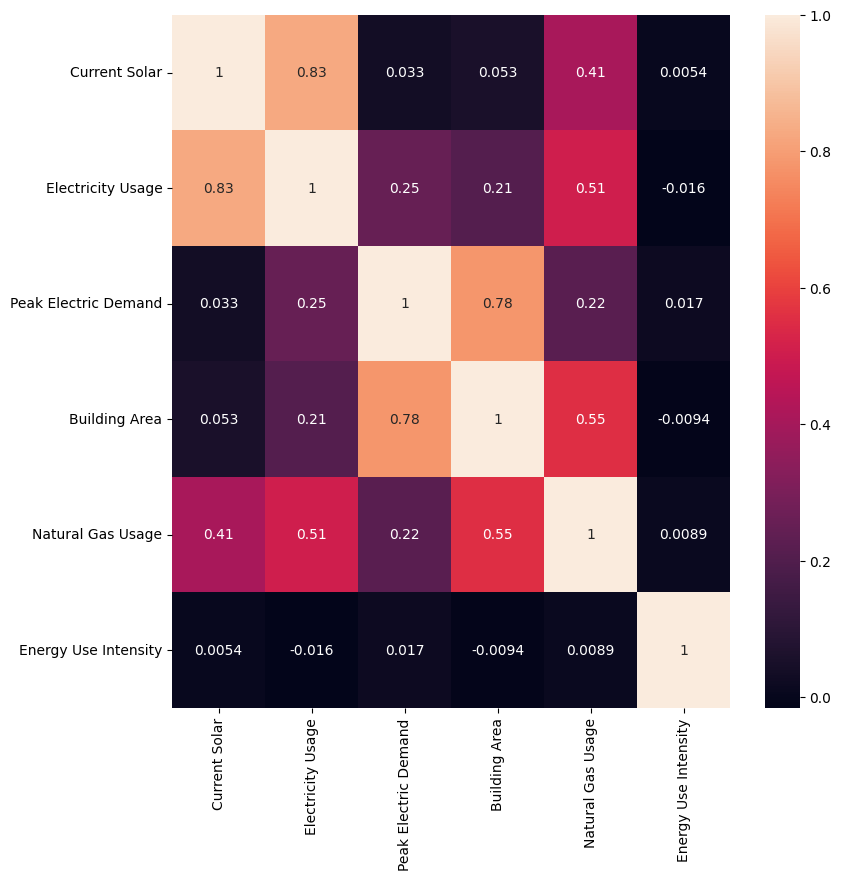

In [ ]:
fig = plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True)
plt.savefig('corr.tiff', format='tiff', dpi=300, bbox_inches = 'tight')

# Function model

In [ ]:
# Linear REgression
def lr(X_train, X_test, X_val, y_train, y_test, y_val):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  score = lr.score(X_train, y_train)

  y_pred_train = lr.predict(X_train)
  y_pred_test = lr.predict(X_test)
  y_pred_val = lr.predict(X_val)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
  rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  mae_val = mean_absolute_error(y_val, y_pred_val)

  # mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
  # mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
  # mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
  mape_train = 100 * (mae_train / np.abs(y_train.mean()))
  mape_test = 100 * (mae_test / np.abs(y_train.mean()))
  mape_val = 100 * (mae_val / np.abs(y_train.mean()))

  print("Score:", score)
  print("Evaluasi data train:")
  print("RMSE:", rmse_train)
  print("MAE:", mae_train)
  print("MAPE:", mape_train)
  print()
  print("Evaluasi data test:")
  print("RMSE:", rmse_test)
  print("MAE:", mae_test)
  print("MAPE:", mape_test)
  print()
  print("Evaluasi data validation:")
  print("RMSE:", rmse_val)
  print("MAE:", mae_val)
  print("MAPE:", mape_val)

In [ ]:
# Lasso Regression
def lasso(X_train, X_test, X_val, y_train, y_test, y_val, alpha):
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  score = lasso.score(X_train, y_train)

  y_pred_train = lasso.predict(X_train)
  y_pred_test = lasso.predict(X_test)
  y_pred_val = lasso.predict(X_val)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
  rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  mae_val = mean_absolute_error(y_val, y_pred_val)

  # mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
  # mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
  # mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
  mape_train = 100 * (mae_train / np.abs(y_train.mean()))
  mape_test = 100 * (mae_test / np.abs(y_train.mean()))
  mape_val = 100 * (mae_val / np.abs(y_train.mean()))
  print("Score:", score)
  print("Evaluasi data train:")
  print("RMSE:", rmse_train)
  print("MAE:", mae_train)
  print("MAPE:", mape_train)
  print()
  print("Evaluasi data test:")
  print("RMSE:", rmse_test)
  print("MAE:", mae_test)
  print("MAPE:", mape_test)
  print()
  print("Evaluasi data validation:")
  print("RMSE:", rmse_val)
  print("MAE:", mae_val)
  print("MAPE:", mape_val)

In [ ]:
# Gradien Boosting Regression
def gbr(X_train, X_test, X_val, y_train, y_test, y_val):
  gbr = GradientBoostingRegressor()
  gbr.fit(X_train, y_train)
  score = gbr.score(X_train, y_train)

  y_pred_train = gbr.predict(X_train)
  y_pred_test = gbr.predict(X_test)
  y_pred_val = gbr.predict(X_val)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
  rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  mae_val = mean_absolute_error(y_val, y_pred_val)

  # mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
  # mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
  # mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
  mape_train = 100 * (mae_train / np.abs(y_train.mean()))
  mape_test = 100 * (mae_test / np.abs(y_train.mean()))
  mape_val = 100 * (mae_val / np.abs(y_train.mean()))
  print("Score:", score)
  print("Evaluasi data train:")
  print("RMSE:", rmse_train)
  print("MAE:", mae_train)
  print("MAPE:", mape_train)
  print()
  print("Evaluasi data test:")
  print("RMSE:", rmse_test)
  print("MAE:", mae_test)
  print("MAPE:", mape_test)
  print()
  print("Evaluasi data validation:")
  print("RMSE:", rmse_val)
  print("MAE:", mae_val)
  print("MAPE:", mape_val)

In [ ]:
# Support Vector Machine
def svm(X_train, X_test, X_val, y_train, y_test, y_val):
  svm = SVR()
  svm.fit(X_train,y_train)
  score = svm.score(X_train, y_train)

  y_pred_train = svm.predict(X_train)
  y_pred_test = svm.predict(X_test)
  y_pred_val = svm.predict(X_val)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
  rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  mae_val = mean_absolute_error(y_val, y_pred_val)

  # mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
  # mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
  # mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
  mape_train = 100 * (mae_train / np.abs(y_train.mean()))
  mape_test = 100 * (mae_test / np.abs(y_train.mean()))
  mape_val = 100 * (mae_val / np.abs(y_train.mean()))
  print("Score:", score)
  print("Evaluasi data train:")
  print("RMSE:", rmse_train)
  print("MAE:", mae_train)
  print("MAPE:", mape_train)
  print()
  print("Evaluasi data test:")
  print("RMSE:", rmse_test)
  print("MAE:", mae_test)
  print("MAPE:", mape_test)
  print()
  print("Evaluasi data validation:")
  print("RMSE:", rmse_val)
  print("MAE:", mae_val)
  print("MAPE:", mape_val)

In [ ]:
# Random Forest regression
def rfr(X_train, X_test, X_val, y_train, y_test, y_val):
  rfr = RandomForestRegressor()
  rfr.fit(X_train, y_train)
  score = rfr.score(X_train, y_train)

  y_pred_train = rfr.predict(X_train)
  y_pred_test = rfr.predict(X_test)
  y_pred_val = rfr.predict(X_val)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
  rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  mae_val = mean_absolute_error(y_val, y_pred_val)

  # mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
  # mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
  # mape_val = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
  mape_train = 100 * (mae_train / np.abs(y_train.mean()))
  mape_test = 100 * (mae_test / np.abs(y_train.mean()))
  mape_val = 100 * (mae_val / np.abs(y_train.mean()))
  print("Score:", score)
  print("Evaluasi data train:")
  print("RMSE:", rmse_train)
  print("MAE:", mae_train)
  print("MAPE:", mape_train)
  print()
  print("Evaluasi data test:")
  print("RMSE:", rmse_test)
  print("MAE:", mae_test)
  print("MAPE:", mape_test)
  print()
  print("Evaluasi data validation:")
  print("RMSE:", rmse_val)
  print("MAE:", mae_val)
  print("MAPE:", mape_val)



#modelling all fitur

## Prep data all fitur


In [ ]:
df_prep = df.copy()

In [ ]:
# split data
X = df_prep.drop('Electricity Usage', axis=1)
y = df_prep['Electricity Usage']

# 80:20 split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42)
# 20 split validation
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)


In [ ]:
X.columns

Index(['Site Name', 'Department', 'Current Solar', 'Electric Utility',
       'Peak Electric Demand', 'Building Type', 'Building Area',
       'Natural Gas Usage', 'Energy Use Intensity', 'Address'],
      dtype='object')

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(402, 10)
(51, 10)
(50, 10)


In [ ]:
# encoding categorical
encoder = LabelEncoder()
#train
X_train['Site Name'] = encoder.fit_transform(X_train['Site Name'])
X_train['Department'] = encoder.fit_transform(X_train['Department'])
X_train['Electric Utility'] = encoder.fit_transform(X_train['Electric Utility'])
X_train['Building Type'] = encoder.fit_transform(X_train['Building Type'])
X_train['Address'] = encoder.fit_transform(X_train['Address'])
#test
X_test['Site Name'] = encoder.fit_transform(X_test['Site Name'])
X_test['Department'] = encoder.fit_transform(X_test['Department'])
X_test['Electric Utility'] = encoder.fit_transform(X_test['Electric Utility'])
X_test['Building Type'] = encoder.fit_transform(X_test['Building Type'])
X_test['Address'] = encoder.fit_transform(X_test['Address'])
#val
X_val['Site Name'] = encoder.fit_transform(X_val['Site Name'])
X_val['Department'] = encoder.fit_transform(X_val['Department'])
X_val['Electric Utility'] = encoder.fit_transform(X_val['Electric Utility'])
X_val['Building Type'] = encoder.fit_transform(X_val['Building Type'])
X_val['Address'] = encoder.fit_transform(X_val['Address'])

##FEATURE IMPORTANCE

<Axes: >

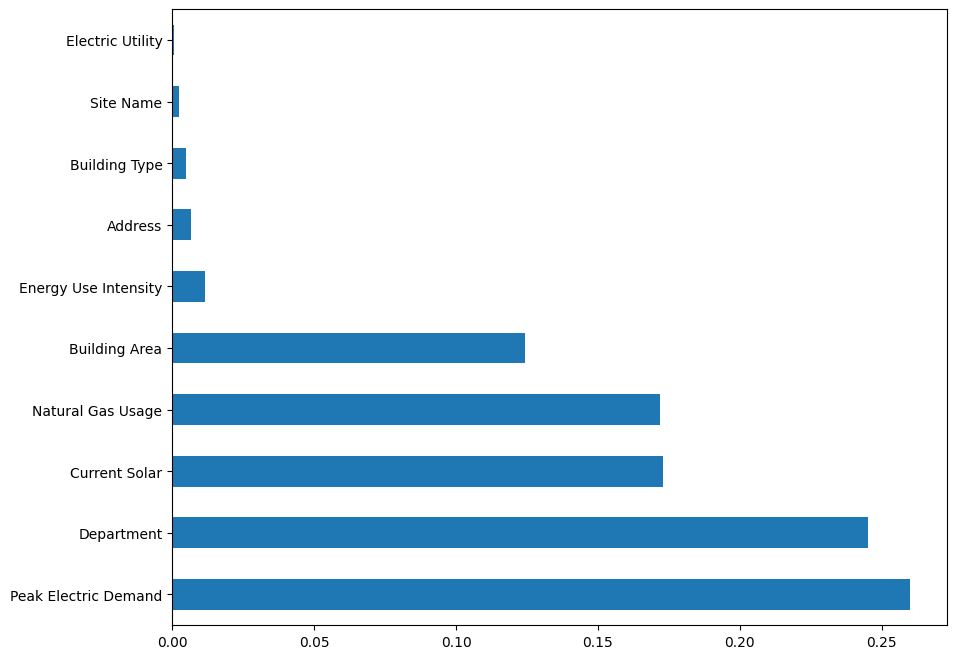

In [ ]:
# Menampilkan fitur penting
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
plt.figure(figsize=(10,8))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
# min max scaler train data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train[['Current Solar', 'Peak Electric Demand', 'Building Area', 'Natural Gas Usage', 'Energy Use Intensity']])

# min max scaler pada test val data
X_test = scaler.transform(X_test[['Current Solar', 'Peak Electric Demand', 'Building Area', 'Natural Gas Usage', 'Energy Use Intensity']])
X_val = scaler.transform(X_val[['Current Solar', 'Peak Electric Demand', 'Building Area', 'Natural Gas Usage', 'Energy Use Intensity']])

## modelling

In [ ]:
lr(X_train, X_test, X_val, y_train, y_test, y_val)

Score: 0.8206665790811654
Evaluasi data train:
RMSE: 5916601.219860564
MAE: 1582308.4954833814
MAPE: 131.5051145205305

Evaluasi data test:
RMSE: 11339795.114129992
MAE: 2721719.9025298227
MAPE: 226.2012044406359

Evaluasi data validation:
RMSE: 5599668.116355161
MAE: 1574120.1749591737
MAPE: 130.82458601971004


In [ ]:
lasso(X_train, X_test, X_val, y_train, y_test, y_val, 1)

Score: 0.8206665790516975
Evaluasi data train:
RMSE: 5916601.220346668
MAE: 1582303.3945719744
MAPE: 131.5046905855389

Evaluasi data test:
RMSE: 11339935.344609125
MAE: 2721730.540805701
MAPE: 226.2020885840831

Evaluasi data validation:
RMSE: 5599663.795869572
MAE: 1574113.5830240184
MAPE: 130.82403816624785


In [ ]:
gbr(X_train, X_test, X_val, y_train, y_test, y_val)

Score: 0.9989902261031063
Evaluasi data train:
RMSE: 443970.1300304849
MAE: 99851.79690307008
MAPE: 8.2986484773992

Evaluasi data test:
RMSE: 14698904.550001556
MAE: 2701486.455419375
MAPE: 224.51960961446918

Evaluasi data validation:
RMSE: 4762008.511902432
MAE: 814107.325096381
MAPE: 67.6601796200915


In [ ]:
svm(X_train, X_test, X_val, y_train, y_test, y_val)

Score: -0.006359296933781566
Evaluasi data train:
RMSE: 14015810.393876722
MAE: 1168930.7031060748
MAPE: 97.14942845678671

Evaluasi data test:
RMSE: 3853593.606482089
MAE: 1059275.6444238783
MAPE: 88.03603426664019

Evaluasi data validation:
RMSE: 5455624.854458304
MAE: 1096124.2930603556
MAPE: 91.09851277364358


In [ ]:
rfr(X_train, X_test, X_val, y_train, y_test, y_val)

Score: 0.837951404375468
Evaluasi data train:
RMSE: 5624246.128090954
MAE: 466824.21630454314
MAPE: 38.79759996316761

Evaluasi data test:
RMSE: 11948524.48828093
MAE: 2431329.187188541
MAPE: 202.0669320243155

Evaluasi data validation:
RMSE: 4491164.760531504
MAE: 773965.9643981826
MAPE: 64.32404494679956


# modelling just high correlation based on Electricity Usage

## prepdata

In [ ]:
# split data
X2 = df_prep[['Current Solar','Energy Use Intensity']]
y2 = df_prep['Electricity Usage']

# 80:20 split
X2_train, X2_rem, y2_train, y2_rem = train_test_split(X2, y2, test_size=0.2, random_state=42)
# 20 split validation
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_rem, y2_rem, test_size=0.5, random_state=42)


In [ ]:
# min max scaler train data
scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)

# min max scaler pada test val data
X2_test = scaler.transform(X2_test)
X2_val = scaler.transform(X2_val)

## modeling

In [ ]:
lr(X2_train, X2_test, X2_val, y2_train, y2_test, y2_val)

Score: 0.7052904091392598
Evaluasi data train:
RMSE: 7584707.147791813
MAE: 1209693.3223846671
MAPE: 100.5371957168939

Evaluasi data test:
RMSE: 3685348.7269324935
MAE: 1118284.402774306
MAPE: 92.94023186574155

Evaluasi data validation:
RMSE: 5446673.830414233
MAE: 1172276.5830297915
MAPE: 97.4275033857884


In [ ]:
lasso(X2_train, X2_test, X2_val, y2_train, y2_test, y2_val,1)

Score: 0.705290409136794
Evaluasi data train:
RMSE: 7584707.147823543
MAE: 1209691.6758358763
MAPE: 100.53705887279054

Evaluasi data test:
RMSE: 3685348.2635725555
MAE: 1118282.280648781
MAPE: 92.9400554966195

Evaluasi data validation:
RMSE: 5446673.463485031
MAE: 1172273.8691855946
MAPE: 97.42727783913114


In [ ]:
gbr(X2_train, X2_test, X2_val, y2_train, y2_test, y2_val)

Score: 0.9965029297642494
Evaluasi data train:
RMSE: 826216.4919935531
MAE: 275183.26878493314
MAPE: 22.870386766546073

Evaluasi data test:
RMSE: 3673161.045862623
MAE: 1181651.5140751675
MAPE: 98.2066506786604

Evaluasi data validation:
RMSE: 4815393.478875519
MAE: 1057297.559650948
MAPE: 87.87163632190436


In [ ]:
svm(X2_train, X2_test, X2_val, y2_train, y2_test, y2_val)

Score: -0.006359419462329319
Evaluasi data train:
RMSE: 14015811.247119121
MAE: 1168931.8304838357
MAPE: 97.14952215276443

Evaluasi data test:
RMSE: 3853597.3421769333
MAE: 1059276.7927991766
MAPE: 88.03612970771603

Evaluasi data validation:
RMSE: 5455625.841002946
MAE: 1096125.7091149255
MAPE: 91.09863046145156


In [ ]:
rfr(X2_train, X2_test, X2_val, y2_train, y2_test, y2_val)

Score: 0.8554831101113045
Evaluasi data train:
RMSE: 5311301.871255948
MAE: 604748.7643373464
MAPE: 50.260461684519406

Evaluasi data test:
RMSE: 3586911.3911902
MAE: 1180644.3648251123
MAPE: 98.12294685109084

Evaluasi data validation:
RMSE: 4821251.423768886
MAE: 1045886.7505648456
MAPE: 86.92328790569908


#HYPERPARAMETER TUNNING function


In [ ]:
# split data
X3 = df_prep[['Current Solar','Energy Use Intensity']]
y3 = df_prep['Electricity Usage']

# 80:20 split
X3_train, X3_rem, y3_train, y3_rem = train_test_split(X3, y3, test_size=0.2, random_state=42)
# 20 split validation
X3_test, X3_val, y3_test, y3_val = train_test_split(X3_rem, y3_rem, test_size=0.5, random_state=42)


In [ ]:
# min max scaler train data
scaler = MinMaxScaler()
X3_train = scaler.fit_transform(X3_train)

# min max scaler pada test val data
X3_test = scaler.transform(X3_test)
X3_val = scaler.transform(X3_val)

In [ ]:
def lr_tuning(X_train, y_train):
    # Buat model Linear Regression
    lr = LinearRegression()

    param_grid = {
    }

    grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    print("Best RMSE:", np.sqrt(-grid_search.best_score_))

    best_model = grid_search.best_estimator_
    print(best_model)

    y2_val_pred = best_model.predict(X2_val)
    val_rmse = mean_squared_error(y2_val, y2_val_pred, squared=False)
    print("Validation RMSE:", val_rmse)

    y2_test_pred = best_model.predict(X2_test)
    test_rmse = mean_squared_error(y2_test, y2_test_pred, squared=False)
    print("Test RMSE:", test_rmse)

    # return best_model

In [ ]:
def lasso_tuning(X_train, y_train):
    # Buat model Lasso Regression
    lasso = Lasso()

    param_grid = {
        'alpha': [0.1, 0.01, 0.001, 0.0001]
    }

    grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    print("Best RMSE:", np.sqrt(-grid_search.best_score_))

    best_model = grid_search.best_estimator_
    print(best_model)

    y2_val_pred = best_model.predict(X2_val)
    val_rmse = mean_squared_error(y2_val, y2_val_pred, squared=False)
    print("Validation RMSE:", val_rmse)

    y2_test_pred = best_model.predict(X2_test)
    test_rmse = mean_squared_error(y2_test, y2_test_pred, squared=False)
    print("Test RMSE:", test_rmse)

    # return best_model

In [ ]:
def gbr_tuning(X_train, y_train):
    # Buat model Gradient Boosting
    gb = GradientBoostingRegressor()

    param_grid = {
        'n_estimators': [10, 50, 100],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 7]
    }

    grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    print("Best RMSE:", np.sqrt(-grid_search.best_score_))

    best_model = grid_search.best_estimator_
    print(best_model)

    y2_val_pred = best_model.predict(X2_val)
    val_rmse = mean_squared_error(y2_val, y2_val_pred, squared=False)
    print("Validation RMSE:", val_rmse)

    y2_test_pred = best_model.predict(X2_test)
    test_rmse = mean_squared_error(y2_test, y2_test_pred, squared=False)
    print("Test RMSE:", test_rmse)

    # return best_model

In [ ]:
def svm_tuning(X_train, y_train):
    # Buat model Support Vector Machine
    svm = SVR()

    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'epsilon': [0.1, 0.01, 0.001]
    }

    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    print("Best RMSE:", np.sqrt(-grid_search.best_score_))

    best_model = grid_search.best_estimator_
    print(best_model)

    y2_val_pred = best_model.predict(X2_val)
    val_rmse = mean_squared_error(y2_val, y2_val_pred, squared=False)
    print("Validation RMSE:", val_rmse)

    y2_test_pred = best_model.predict(X2_test)
    test_rmse = mean_squared_error(y2_test, y2_test_pred, squared=False)
    print("Test RMSE:", test_rmse)

    # return best_model

In [ ]:
def rf_tuning(X_train, y_train):
    # Buat model Random Forest Regression
    rf = RandomForestRegressor()

    param_grid = {
        'n_estimators': [10, 50, 100],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)

    print("Best RMSE:", np.sqrt(-grid_search.best_score_))

    best_model = grid_search.best_estimator_
    print(best_model)

    y2_val_pred = best_model.predict(X2_val)
    val_rmse = mean_squared_error(y2_val, y2_val_pred, squared=False)
    print("Validation RMSE:", val_rmse)

    y2_test_pred = best_model.predict(X2_test)
    test_rmse = mean_squared_error(y2_test, y2_test_pred, squared=False)
    print("Test RMSE:", test_rmse)

    # return best_model

# TEST TUNNING


In [ ]:
lr_tuning(X2_train, y2_train)

Best Parameters: {}
Best RMSE: 7.710115086818586
LinearRegression()
Validation RMSE: 5446673.830414233
Test RMSE: 3685348.7269324935


In [ ]:
lasso_tuning(X2_train, y2_train)

Best Parameters: {'alpha': 0.1}
Best RMSE: 7.710114129233845
Lasso(alpha=0.1)
Validation RMSE: 5446673.793719617
Test RMSE: 3685348.6805955875


In [ ]:
gbr_tuning(X2_train, y2_train)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 10}
Best RMSE: 1.1516329508555856
GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=10)
Validation RMSE: 5297822.118026576
Test RMSE: 3716980.100413375


In [ ]:
svm_tuning(X2_train, y2_train)

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best RMSE: 0.23561746908730063
SVR(C=10)
Validation RMSE: 5455632.729238866
Test RMSE: 3853597.479407799


In [ ]:
rf_tuning(X2_train, y2_train)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Best RMSE: 0.7902543976423765
RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=10)
Validation RMSE: 4855780.514938493
Test RMSE: 3709036.80379264
